In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams['font.size'] = '13'
# cd .\semestr2\ASwDCiC\lab4\

In [16]:
x=0

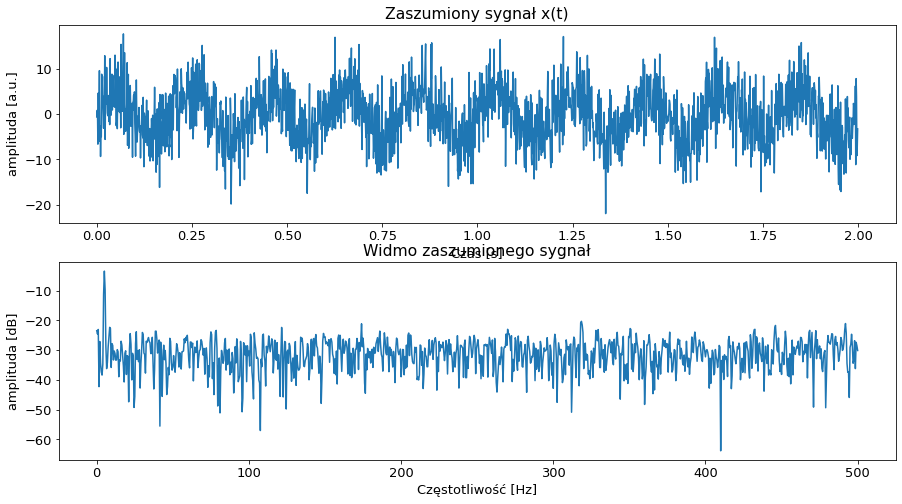

In [17]:
N = 2000
A = 5
f = 5
fs = 1000
dt = 1/fs
t = np.arange(N) * dt

x = A * np.sin(2 * np.pi * f * t) + A *np.random.normal(0, 1, N)

widmo_sygnalu = 20 * np.log10(np.abs(np.fft.rfft(x * np.hamming(N))) / N/2)
f = np.fft.rfftfreq(N, 1 / fs)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,x)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_sygnalu)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')
plt.show()

In [19]:
def signalPower(x):
    return np.average(x**2)

In [20]:
def SNR(signal, noise):
    powS = signalPower(signal)
    powN = signalPower(noise)
    return 10*np.log10((powS-powN)/powN)

In [21]:
def SNRsystem(inputSig, outputSig):
    noise = outputSig-inputSig
    
    powS = signalPower(outputSig)
    powN = signalPower(noise)
    return 10*np.log10((powS-powN)/powN)

In [12]:
def signaltonoiseScipy(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
method1 = SNR(exampleOutput,noiseOnly)
print("Result Method 1: {} dB".format(method1))

In [18]:
SNRscipy = 20*np.log10(abs(signaltonoiseScipy(x)))

print("SNR by scipy: {} dB".format(SNRscipy))

SNR by scipy: -26.183403774364447 dB
